In [2]:
import Ws_model_generator as wsg
import networkx as nx
import pandas as pd
import numpy as np

In [6]:
ws = wsg.Ws_generator(10, 6)
ws.G.remove_edge(0,1)
ws.G.add_edge(0, 4)

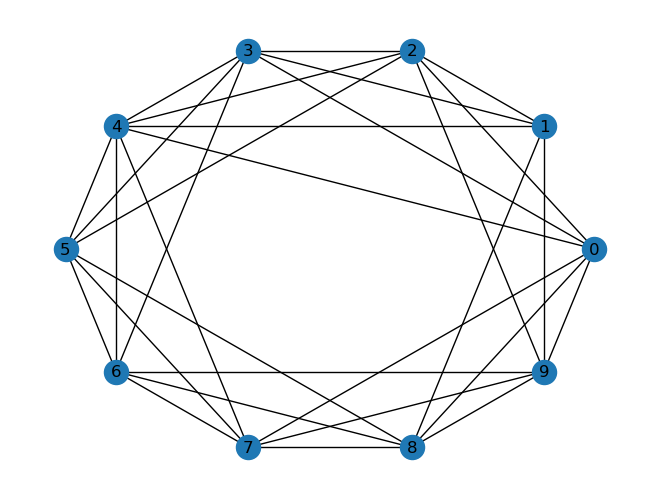

In [9]:
nx.draw_circular(ws.G, with_labels = True)

In [10]:
def values_generator_depending_on_n(num_vertex):
    ws = wsg.Ws_generator(num_vertex, 6)
    ws.G.remove_edge(0,1)
    ws.G.add_edge(0, 4)
    minimum_distances = dict(nx.shortest_path_length(ws.G))
    graph = ws.G
    the_neighbourhood_vertices = {}
    # cardinality_of_v_neighbourhood = []
    for k_values in range(ws.halfk):
        the_neighbourhood_vertices['n_u_0' + str(k_values+1)] = []
        the_neighbourhood_vertices['n_v_0' + str(k_values+1)] = []
        for final_vertex_of_edge in range(ws.num_vertices):
            if minimum_distances[0][final_vertex_of_edge] < minimum_distances[k_values+1][final_vertex_of_edge]:
                the_neighbourhood_vertices['n_u_0' + str(k_values+1)].append(final_vertex_of_edge)
            elif minimum_distances[0][final_vertex_of_edge] > minimum_distances[k_values+1][final_vertex_of_edge]:
                the_neighbourhood_vertices['n_v_0' + str(k_values+1)].append(final_vertex_of_edge) 
        # cardinality_of_v_neighbourhood['n_u_0' + str(k_values+1)] = len(the_neighbourhood_vertices['n_u_0' + str(k_values+1)])  
    #     cardinality_of_v_neighbourhood.append(len(the_neighbourhood_vertices['n_u_0' + str(k_values+1)]))
    # return graph, cardinality_of_v_neighbourhood
    return graph, the_neighbourhood_vertices

In [6]:
def myformula_for_finding_n_u(n, k):
    A = int(np.ceil((n-k-1)/k))
    n_v = [0] * (int(k/2))
    mod_rem = np.mod(n-k-1, k)
    rem_val = [the_rem for the_rem in range(1, int(k/2))]
    for i in range(int(k/2)):
        if mod_rem not in rem_val[:i]:
            n_v[i] = (i+1) * A + 1
        else:
            n_v[i] = (i+1) * A - (i - 1) + (mod_rem - 1)
    return n_v

In [30]:
def myformula_for_finding_n_u_1(n, k):
    A = int(np.floor((n - 1)/k))
    # A1 = int(np.floor((n - 2)/2))
    n_v = [0] * (int(k/2))
    h = int(k/2)
    mod_rem = np.mod(n - 1, k)
    # mod_rem = np.mod(n, h)
    rem_val = [the_rem for the_rem in range(0, int(k/2))]
    # print(mod_rem)
    for i in range(int(k/2)):
        # print(rem_val[:i+1])
        if mod_rem not in rem_val[:i+1]:
            # print("if")
            n_v[i] = (i+1) * A + 1
        else:
            # print("else")
            n_v[i] = (i+1) * A + 1 - (i + 1 - mod_rem)
    return n_v

In [31]:
hi = [1 ,2, 3]
hi[: 1]

[1]

In [36]:
the_table_of_n_u_v = {}
K = {}
valus21 = 0
for n in range(495, 500):
# for n in range(7, 13):
    K[n], the_table_of_n_u_v[n] = values_generator_depending_on_n(n)
    if myformula_for_finding_n_u_1(n,6) != the_table_of_n_u_v[n]:
        print("n is ", n)
        print(the_table_of_n_u_v[n])
        print(myformula_for_finding_n_u_1(n,6))
        valus21 += 1
print(valus21)

0


In [33]:
myformula_for_finding_n_u_1(80,6) == the_table_of_n_u_v[80]

True

In [34]:
the_table_of_n_u_v[80]

[14, 26, 38]

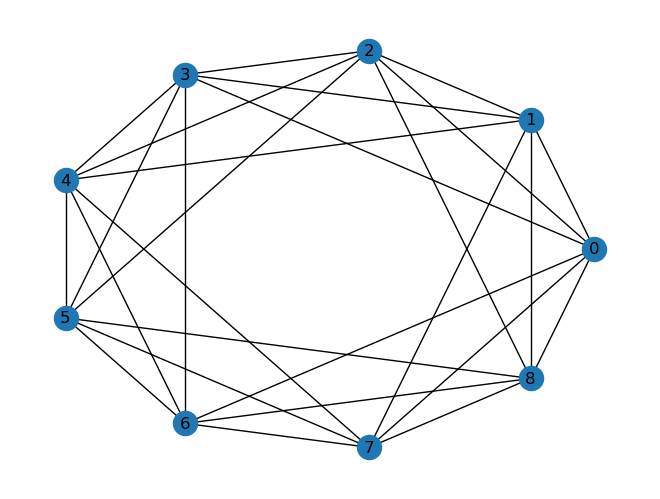

In [96]:
nx.draw_circular(K[9], with_labels = True)

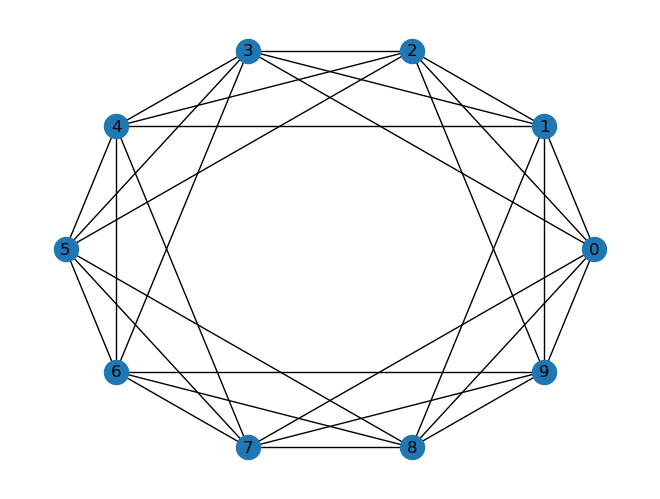

In [97]:
nx.draw_circular(K[10], with_labels = True)


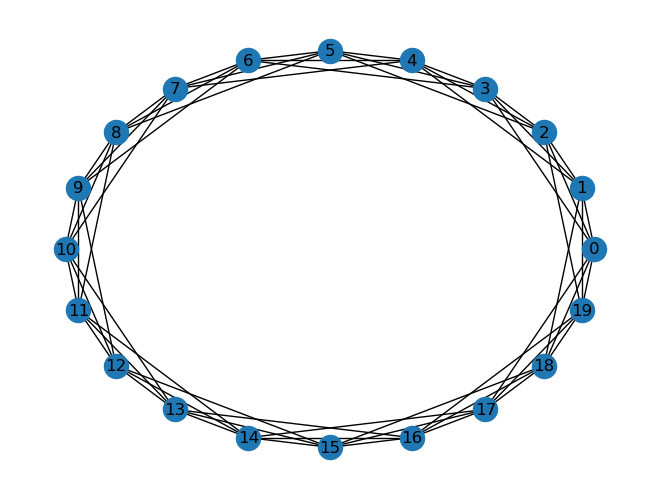

In [93]:
nx.draw_circular(K[20], with_labels = True)

In [11]:
k1, the_table_of_n_u_v_1 = values_generator_depending_on_n(10)

In [13]:
the_table_of_n_u_v_1

{'n_u_01': [0, 7],
 'n_v_01': [1],
 'n_u_02': [0, 7, 8],
 'n_v_02': [1, 2, 5],
 'n_u_03': [0, 7, 8, 9],
 'n_v_03': [1, 3, 5, 6]}